In [255]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [256]:
#function 1

def periodic_func1(t):
    v1 = ai[0] + ai[1]*t + ai[2]*np.sin(ai[4]*t) + ai[3]*np.cos(ai[4]*t)
    return v1

def fitfunction1(t,a,b,c,d,e):
    tp = np.array(t)
    return a + b*tp + c*np.sin(e*tp) + d*np.cos(e*tp)

def fitfunction2(t,a,b,c,d,e):
    tp = np.array(t)
    return a + b*tp + c*np.sin(d*tp + e)

In [257]:
ai = [0,0,0,0,0]

ai[0] = 0
ai[1] = 1
ai[2] = 1
ai[3] = 1
ai[4] = 0.001 # the errors get angry if this is set to zero. you get +/- INF

In [258]:
t = np.linspace(20, 35, 100)
t = t + np.random.uniform(-0.5, 0.5)
print(t)

[19.82264225 19.97415741 20.12567256 20.27718771 20.42870286 20.58021801
 20.73173316 20.88324831 21.03476347 21.18627862 21.33779377 21.48930892
 21.64082407 21.79233922 21.94385437 22.09536953 22.24688468 22.39839983
 22.54991498 22.70143013 22.85294528 23.00446044 23.15597559 23.30749074
 23.45900589 23.61052104 23.76203619 23.91355134 24.0650665  24.21658165
 24.3680968  24.51961195 24.6711271  24.82264225 24.97415741 25.12567256
 25.27718771 25.42870286 25.58021801 25.73173316 25.88324831 26.03476347
 26.18627862 26.33779377 26.48930892 26.64082407 26.79233922 26.94385437
 27.09536953 27.24688468 27.39839983 27.54991498 27.70143013 27.85294528
 28.00446044 28.15597559 28.30749074 28.45900589 28.61052104 28.76203619
 28.91355134 29.0650665  29.21658165 29.3680968  29.51961195 29.6711271
 29.82264225 29.97415741 30.12567256 30.27718771 30.42870286 30.58021801
 30.73173316 30.88324831 31.03476347 31.18627862 31.33779377 31.48930892
 31.64082407 31.79233922 31.94385437 32.09536953 32.

In [259]:
y = periodic_func1(t)
print(y)

[20.84226714 20.99393076 21.14559436 21.29725793 21.44892148 21.60058501
 21.75224852 21.903912   22.05557546 22.20723889 22.3589023  22.51056569
 22.66222905 22.81389239 22.96555571 23.11721901 23.26888228 23.42054552
 23.57220875 23.72387195 23.87553512 24.02719828 24.17886141 24.33052451
 24.48218759 24.63385065 24.78551369 24.9371767  25.08883969 25.24050266
 25.3921656  25.54382852 25.69549141 25.84715428 25.99881713 26.15047995
 26.30214275 26.45380553 26.60546828 26.75713101 26.90879372 27.0604564
 27.21211906 27.3637817  27.51544431 27.6671069  27.81876946 27.97043201
 28.12209452 28.27375702 28.42541949 28.57708194 28.72874436 28.88040676
 29.03206914 29.18373149 29.33539382 29.48705612 29.63871841 29.79038066
 29.9420429  30.09370511 30.2453673  30.39702946 30.5486916  30.70035372
 30.85201581 31.00367788 31.15533993 31.30700195 31.45866395 31.61032592
 31.76198788 31.9136498  32.06531171 32.21697359 32.36863544 32.52029728
 32.67195909 32.82362087 32.97528264 33.12694437 33.

In [260]:
popt, pcov = curve_fit(fitfunction1, t, y, p0=ai)

In [261]:
yfit = []
chi2=0
for i in range (0,100):
    yfit.append(fitfunction1(t[i],*popt))
    chi2 += (t[i]-yfit[i])*(t[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,100-len(ai)))

param = []
param.append(float(chi2))
param.append(100-len(ai))
for ii in range(0,len(ai)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))

Chi^2 / dof = 1.055E+02 / 95
Fit Parameter 0: 0.000E+00 +/- 0.000E+00
Fit Parameter 1: 1.000E+00 +/- 0.000E+00
Fit Parameter 2: 1.000E+00 +/- 0.000E+00
Fit Parameter 3: 1.000E+00 +/- 0.000E+00
Fit Parameter 4: 1.000E-03 +/- 0.000E+00


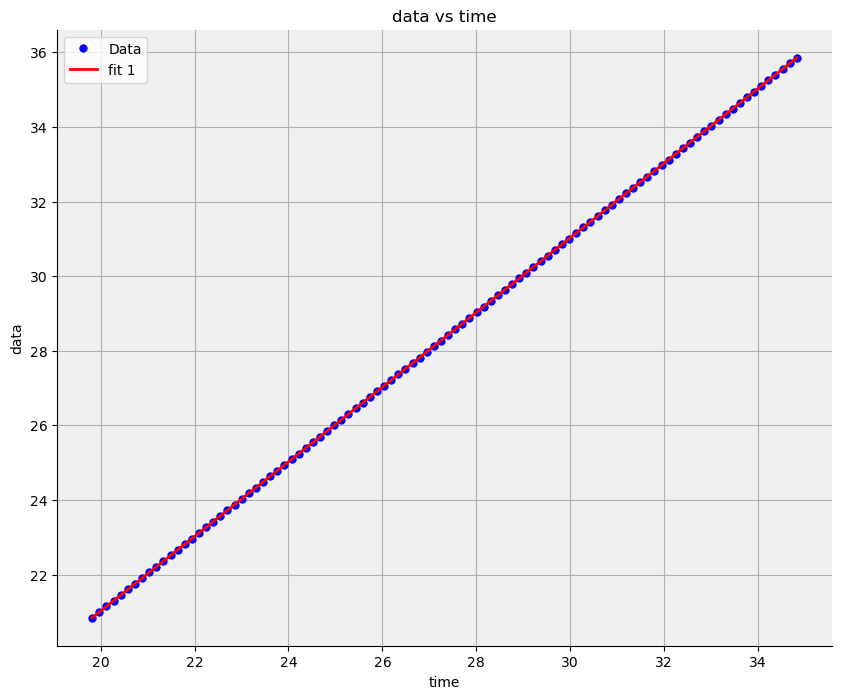

In [262]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(t, y, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
plt.plot(t,yfit,color='r', linewidth=2, label = 'fit 1')

# Set the plot title and axis labels
plt.title("data vs time")
plt.xlabel("time")
plt.ylabel("data")
#plt.yscale("log")
plt.legend()

In [263]:
popt, pcov = curve_fit(fitfunction2, t, y, p0=ai)

In [264]:
yfit = []
chi2=0
for i in range (0,100):
    yfit.append(fitfunction2(t[i],*popt))
    chi2 += (t[i]-yfit[i])*(t[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,100-len(ai)))

param = []
param.append(float(chi2))
param.append(100-len(ai))
for ii in range(0,len(ai)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))

Chi^2 / dof = 1.055E+02 / 95
Fit Parameter 0: 1.000E+00 +/- 5.192E-06
Fit Parameter 1: 1.001E+00 +/- 1.878E-07
Fit Parameter 2: -5.345E-06 +/- 1.134E-06
Fit Parameter 3: 9.749E-01 +/- 1.467E-02
Fit Parameter 4: 6.980E-02 +/- 3.692E-01


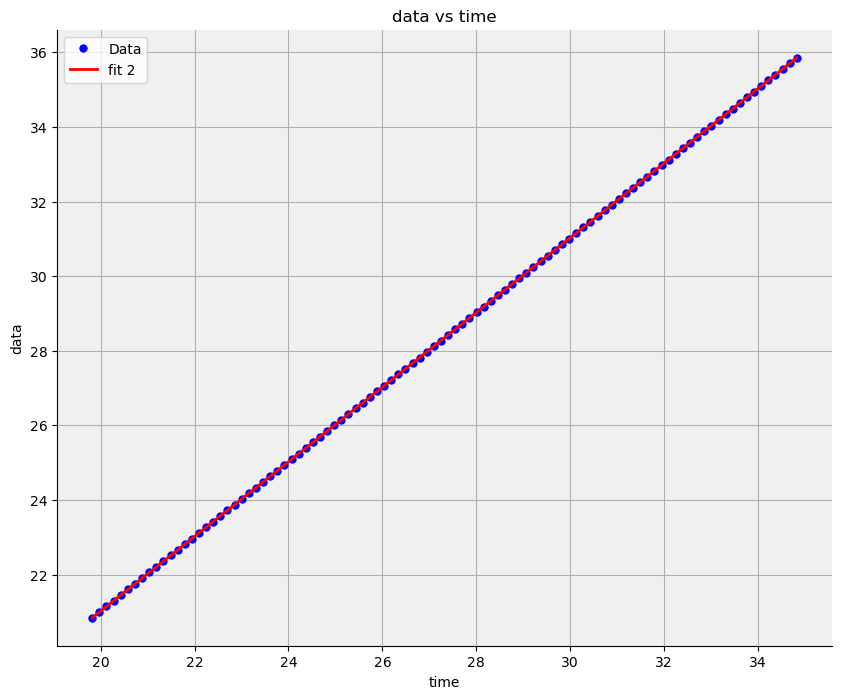

In [265]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(t, y, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
plt.plot(t,yfit,color='r', linewidth=2, label = 'fit 2')

# Set the plot title and axis labels
plt.title("data vs time")
plt.xlabel("time")
plt.ylabel("data")
#plt.yscale("log")
plt.legend()